In [ ]:
#install Kaggle
! pip install -q kaggle

In [ ]:
#Import Library and upload kaggle.json file
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jawher12","key":"cb8a49b051d8a91adaae3882c78d1795"}'}

In [ ]:
#Create directory named kaggle
! mkdir ~/.kaggle

In [ ]:
#Copy kaggle.json file to kaggle directory
! cp kaggle.json ~/.kaggle/
#Change file permission.
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#List all kaggle datasets
! kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide            Covid Cases and Deaths WorldWide                     8KB  2023-02-01 12:22:51           2809         74  1.0              
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                         480KB  2023-01-04 12:50:31          12018        382  1.0              
datascientistanna/customers-dataset                             Shop Customer Data                                  23KB  2023-02-07 18:42:21           2166         64  1.0              
themrityunjaypathak/most-subscribed-1000-youtube-channels       M

In [ ]:
! kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

 93% 112M/121M [00:01<00:00, 116MB/s] 
100% 121M/121M [00:01<00:00, 99.8MB/s]


In [ ]:
! unzip face-expression-recognition-dataset.zip -d face-expression-recognition-dataset


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: face-expression-recognition-dataset/images/validation/fear/8797.jpg  
  inflating: face-expression-recognition-dataset/images/validation/fear/8818.jpg  
  inflating: face-expression-recognition-dataset/images/validation/fear/886.jpg  
  inflating: face-expression-recognition-dataset/images/validation/fear/9037.jpg  
  inflating: face-expression-recognition-dataset/images/validation/fear/9040.jpg  
  inflating: face-expression-recognition-dataset/images/validation/fear/9101.jpg  
  inflating: face-expression-recognition-dataset/images/validation/fear/911.jpg  
  inflating: face-expression-recognition-dataset/images/validation/fear/9179.jpg  
  inflating: face-expression-recognition-dataset/images/validation/fear/9205.jpg  
  inflating: face-expression-recognition-dataset/images/validation/fear/9232.jpg  
  inflating: face-expression-recognition-dataset/images/validation/fear/9251.jpg  
  inflating

In [ ]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow import keras
from keras import layers
from keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from skimage.transform import resize

import h5py

In [ ]:
picture_size = 48
folder_path = "face-expression-recognition-dataset/images/"

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array

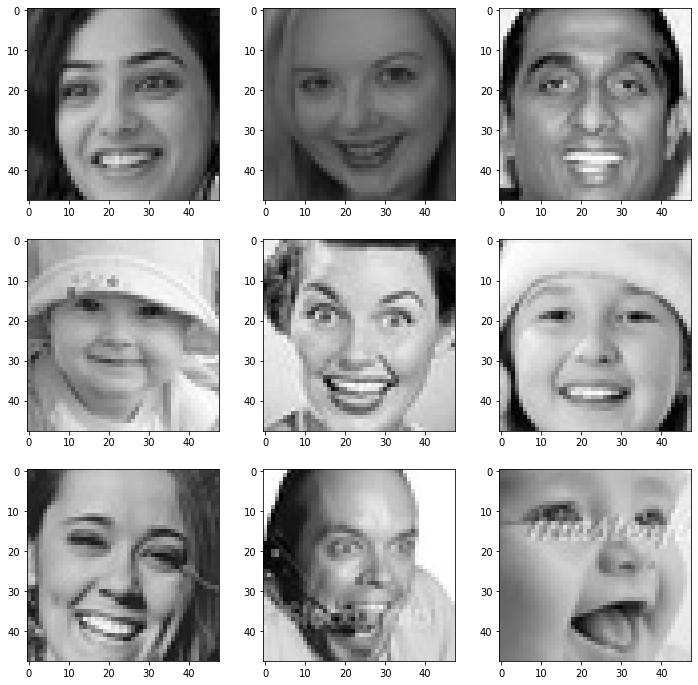

In [ ]:
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"/"+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"/"+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import MaxPooling2D
from keras.models import Model, Sequential
#from tensorflow.python.keras.optimizer_v2.adam import Adam
#from keras.optimizers import adam_v2
from tensorflow.keras.optimizers import RMSprop
#from keras.optimizers import rmsprop
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

In [ ]:
import tensorflow
tensorflow.keras.backend.clear_session()

In [ ]:
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate = 0.0001)

In [ ]:
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/48


<ipython-input-21-981791b505f2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


225/225 [==============================] - 1718s 8s/step - loss: 1.6556 - accuracy: 0.3639 - val_loss: 1.5941 - val_accuracy: 0.3696 - lr: 0.0010
Epoch 2/48
 30/225 [===>..........................] - ETA: 21:55 - loss: 1.4764 - accuracy: 0.4391

KeyboardInterrupt: ignored

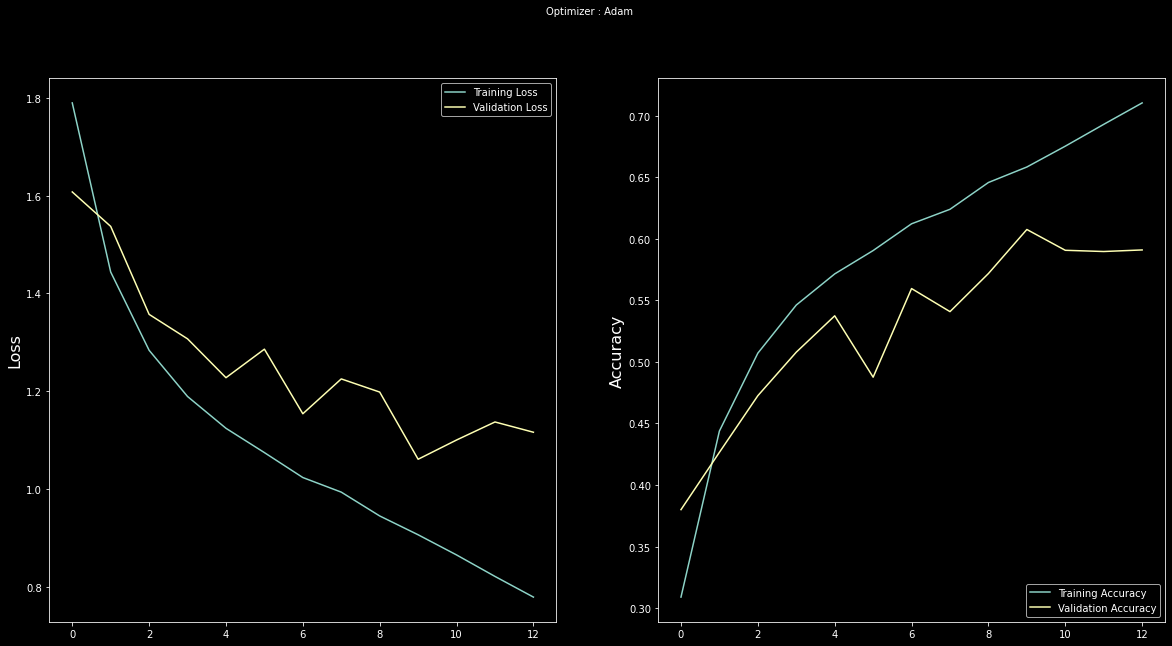

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.save('Mymodel.h5')

In [ ]:
model.save('model')

In [ ]:
model2 = tf.keras.models.load_model('model')

In [ ]:
new_model=load_model('MyModel')
test_img=cv2.imread('happy-boy.jpg')
test_img.shape
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
 
gray=cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

faces=faceCascade.detectMultiScale(gray,1.1,4)

for x,y,w,h in faces:
    roi_gray=gray[y:y+h, x:x+w]
    roi_color=test_img[y:y+h, x:x+w]
    cv2.rectangle(test_img, (x,y), (x+w,y+h), (255,0,0),2)
    facess=faceCascade.detectMultiScale(roi_gray)
    
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi=roi_color[ey: ey+eh, ex: ex+ew]

face_roi=cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB)

plt.imshow(face_roi)
finalimage=cv2.resize(face_roi , (48,48))
finalimage1=np.expand_dims(finalimage, axis=0)
finalimage=finalimage1/255.0


prediction=new_model.predict(finalimage)
prediction
path="haarcascade_frontalface_default.xml"
font_scale=1.6
font=cv2.FONT_ITALIC

rectangle_bgr=(255,255,255)
img=np.zeros((500,500))

text="some text in a boxl"

(text_width, text_height)=cv2.getTextSize(text,font, fontScale=font_scale, thickness=1)[0]
text_offset_x=10
text_offset_y=img.shape[0]-25

box_coords=((text_offset_x,text_offset_y),(text_offset_x+text_width+2,text_offset_y-text_height-2))

cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)

cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0,0,115), thickness=1)

cap=cv2.VideoCapture(1)
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open Camera")

while True:
    ret,test_img=cap.read()

    faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    gray=cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
    faces=faceCascade.detectMultiScale(gray, 1.1, 4)


    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color=test_img[y:y+h, x:x+w]
        cv2.rectangle(test_img, (x,y), (x+w,y+h), (255,0,0),2)
        facess=faceCascade.detectMultiScale(roi_gray)
        
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi=roi_color[ey: ey+eh, ex: ex+ew]


    face_roi=cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB)
    finalimage=cv2.resize(face_roi, (48,48))
    finalimage=np.expand_dims(finalimage, axis=0)
    finalimage=finalimage/255.0

    finalimage=finalimage.reshape(1,48,48,3)

    font=cv2.FONT_HERSHEY_SIMPLEX

    prediction=new_model.predict(finalimage)

    font_scale=1.5
    font=cv2.FONT_HERSHEY_PLAIN

    if (np.argmax(prediction)==0):
        status= "Angry"

        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(test_img, (x1,x1),(x1+w1, y1+h1),(0,0,0), -1)
        cv2.putText(test_img, status, (x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_PLAIN, 0.3, (0,0,255),2)
        cv2.putText(test_img, status,(100,150), font , 3, (0,0,255),2, cv2.LINE_4)
        cv2.rectangle(test_img, (x,y), (x+w, y+h), (112,0,25))


    elif (np.argmax(prediction)==1):
        status= "Disgust"

        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(test_img, (x1,x1),(x1+w1, y1+h1),(0,0,0), -1)
        cv2.putText(test_img, status, (x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_PLAIN, 0.3, (0,0,255),2)
        cv2.putText(test_img, status,(100,150), font , 3, (0,0,255),2, cv2.LINE_4)
        cv2.rectangle(test_img, (x,y), (x+w, y+h), (112,0, 25))
    
    elif (np.argmax(prediction)==2):
        status= "Fear"

        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(test_img, (x1,x1),(x1+w1, y1+h1),(0,0,0), -1)
        cv2.putText(test_img, status, (x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_PLAIN, 0.3, (0,0,255),2)
        cv2.putText(test_img, status,(100,150), font , 3, (0,0,255),2, cv2.LINE_4)
        cv2.rectangle(test_img, (x,y), (x+w, y+h), (112,0, 25))

    elif (np.argmax(prediction)==3):
        status= "Happy"

        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(test_img, (x1,x1),(x1+w1, y1+h1),(0,0,0), -1)
        cv2.putText(test_img, status, (x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_PLAIN, 0.3, (0,0,255),2)
        cv2.putText(test_img, status,(100,150), font , 3, (0,0,255),2, cv2.LINE_4)
        cv2.rectangle(test_img, (x,y), (x+w, y+h), (112,0, 25))

    elif (np.argmax(prediction)==4):
        status= "Sad"

        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(test_img, (x1,x1),(x1+w1, y1+h1),(0,0,0), -1)
        cv2.putText(test_img, status, (x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_PLAIN, 0.3, (0,0,255),2)
        cv2.putText(test_img, status,(100,150), font , 3, (0,0,255),2, cv2.LINE_4)
        cv2.rectangle(test_img, (x,y), (x+w, y+h), (112,0, 25))
    
    elif (np.argmax(prediction)==5):
        status= "Surprise"

        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(test_img, (x1,x1),(x1+w1, y1+h1),(0,0,0), -1)
        cv2.putText(test_img, status, (x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_PLAIN, 0.3, (0,0,255),2)
        cv2.putText(test_img, status,(100,150), font , 3, (0,0,255),2, cv2.LINE_4)
        cv2.rectangle(test_img, (x,y), (x+w, y+h), (112,0, 25))

    else:
        status= "Neutral"

        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(test_img, (x1,x1),(x1+w1, y1+h1),(0,0,0), -1)
        cv2.putText(test_img, status, (x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_PLAIN, 0.3, (0,255,0),2)
        cv2.putText(test_img, status,(100,150), font , 3, (0,0,255),2, cv2.LINE_4)
        cv2.rectangle(test_img, (x,y), (x+w, y+h), (112,0,25))


    cv2.imshow('Face Emotion Recognition', test_img)

    if cv2.waitKey(2) & 0xFF==ord('q'):
        break

cap.release
cv2.destroyAllWindows()

error: ignored

In [ ]:
from keras.models import load_model
base_model = tf.keras.applications.ResNet50(input_shape = (48,48,3),include_top=False,weights="imagenet")

In [ ]:
for layer in base_model.layers[:-4]:
    layer.trainable=False

In [ ]:
# Building Model

model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(7,activation='softmax'))

In [ ]:
# Model Summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 dropout_6 (Dropout)         (None, 2, 2, 2048)        0         
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 batch_normalization_6 (Batc  (None, 8192)             32768     
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 32)                262176    
                                                                 
 batch_normalization_7 (Batc  (None, 32)               128       
 hNormalization)                                      

In [ ]:
opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/48


<ipython-input-53-981791b505f2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


225/225 [==============================] - 25s 81ms/step - loss: 2.1335 - accuracy: 0.1530 - val_loss: 1.8788 - val_accuracy: 0.2869 - lr: 1.0000e-04
Epoch 2/48
225/225 [==============================] - 17s 74ms/step - loss: 1.9625 - accuracy: 0.2168 - val_loss: 1.8050 - val_accuracy: 0.3304 - lr: 1.0000e-04
Epoch 3/48
225/225 [==============================] - 15s 68ms/step - loss: 1.8806 - accuracy: 0.2548 - val_loss: 1.7581 - val_accuracy: 0.3506 - lr: 1.0000e-04
Epoch 4/48
225/225 [==============================] - 14s 63ms/step - loss: 1.8212 - accuracy: 0.2746 - val_loss: 1.7210 - val_accuracy: 0.3614 - lr: 1.0000e-04
Epoch 5/48
225/225 [==============================] - 14s 61ms/step - loss: 1.7820 - accuracy: 0.2885 - val_loss: 1.6833 - val_accuracy: 0.3730 - lr: 1.0000e-04
Epoch 6/48
225/225 [==============================] - 14s 61ms/step - loss: 1.7451 - accuracy: 0.3041 - val_loss: 1.6570 - val_accuracy: 0.3812 - lr: 1.0000e-04
Epoch 7/48
225/225 [=========================

In [ ]:
base_model = tf.keras.applications.VGG16(
    input_shape = (48, 48, 3), 
    include_top = False, 
    weights = 'imagenet'
)

#Start with a non trainable model
base_model.trainable = False


In [ ]:
cnn = Sequential ([
    base_model,
    

    Flatten(),
    
    Dense(64, activation='relu'),
    Dropout(0.50),
    Dense(32, activation='relu'),
    Dropout(0.25),
    Dense(32, activation='relu'),
    Dropout(0.15),
    Dense(7, activation='softmax')
])

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1

In [ ]:
opt = tf.keras.optimizers.Adam(0.0001)
cnn.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
h1 = cnn.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

<ipython-input-64-de1e00351b32>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  h1 = cnn.fit_generator(generator=train_set,


Epoch 1/48
225/225 [==============================] - 16s 58ms/step - loss: 11.7682 - accuracy: 0.1308 - val_loss: 2.4620 - val_accuracy: 0.2331 - lr: 1.0000e-04
Epoch 2/48
225/225 [==============================] - 13s 56ms/step - loss: 4.8476 - accuracy: 0.1582 - val_loss: 2.0210 - val_accuracy: 0.2303 - lr: 1.0000e-04
Epoch 3/48
225/225 [==============================] - 12s 55ms/step - loss: 3.3103 - accuracy: 0.1638 - val_loss: 1.9227 - val_accuracy: 0.2384 - lr: 1.0000e-04
Epoch 4/48
225/225 [==============================] - 12s 54ms/step - loss: 2.6929 - accuracy: 0.1731 - val_loss: 1.8926 - val_accuracy: 0.2418 - lr: 1.0000e-04
Epoch 5/48
225/225 [==============================] - 12s 54ms/step - loss: 2.3768 - accuracy: 0.1830 - val_loss: 1.8795 - val_accuracy: 0.2466 - lr: 1.0000e-04
Epoch 6/48
225/225 [==============================] - 14s 62ms/step - loss: 2.2119 - accuracy: 0.1887 - val_loss: 1.8740 - val_accuracy: 0.2521 - lr: 1.0000e-04
Epoch 7/48
225/225 [=============

In [ ]:
history = h1.history
n_epochs = len(history['loss'])

plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['accuracy'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_accuracy'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
base_model.trainable = True
opt = tf.keras.optimizers.Adam(0.00001)
cnn.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:

h2 = cnn.fit(
    X_train_color,y_train,
    steps_per_epoch=len(X_train_color) / 64,
    epochs=100,
    validation_data=(X_valid_color,y_valid),
    validation_steps=len(X_valid_color) / 64,
    verbose=1
)